<a href="https://colab.research.google.com/github/lekhuong0196/Python_RFM_Analysis-Customer-segmentation/blob/main/Python_RFM_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install squarify

In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import squarify


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/MYPROJECTS/PYTHON/RFM_ANALYSIS/'
data = pd.read_excel(path + 'ecommerce retail.xlsx')

Mounted at /content/drive


In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
print('Dataframe dimension: ', data.shape)

Dataframe dimension:  (541909, 8)


In [ ]:
# with the available data and context, it is impossible to impute values for ~140k rows where CustomerID is null. Therefore,
# we delete these rows from the dataframe in this situation; we also drop duplicate rows in this step

data = data.dropna(subset=['CustomerID'], axis=0).drop_duplicates()
print('Dataframe dimension after dropping null CustomerIDs and duplicate rows: ', data.shape)

Dataframe dimension after dropping null CustomerIDs and duplicate rows:  (401604, 8)


In [ ]:
# convert some columns to the potentially correct data type

data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['CustomerID'] = data['CustomerID'].astype(int)

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  int64         
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.6+ MB


In [ ]:
delivered = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0) & (data['Country'] == 'United Kingdom')]
delivered['InvoiceNo'] = delivered['InvoiceNo'].astype(int)
delivered['Revenue'] = delivered.loc[:, 'Quantity'] * delivered.loc[:, 'UnitPrice']
delivered

In [ ]:
agg_delivered = delivered.groupby(['InvoiceNo', 'Country', 'CustomerID']).agg({'InvoiceDate': 'max',
                                                                              'Revenue': 'sum'}).reset_index()
agg_delivered

,InvoiceNo,Country,CustomerID,InvoiceDate,Revenue
0,536365,United Kingdom,17850,2010-12-01 08:26:00,139.12
1,536366,United Kingdom,17850,2010-12-01 08:28:00,22.20
2,536367,United Kingdom,13047,2010-12-01 08:34:00,278.73
3,536368,United Kingdom,13047,2010-12-01 08:34:00,70.05
4,536369,United Kingdom,13047,2010-12-01 08:35:00,17.85
...,...,...,...,...,...
16641,581582,United Kingdom,17581,2011-12-09 12:21:00,29.88
16642,581583,United Kingdom,13777,2011-12-09 12:23:00,124.60
16643,581584,United Kingdom,13777,2011-12-09 12:25:00,140.64
16644,581585,United Kingdom,15804,2011-12-09 12:31:00,329.05


In [ ]:
agg_delivered.describe()

,InvoiceNo,CustomerID,InvoiceDate,Revenue
count,16646.000000,16646.000000,16646,16646.000000
mean,559465.892887,15507.717890,2011-07-01 02:44:58.979934976,437.644157
min,536365.000000,12346.000000,2010-12-01 08:26:00,0.380000
25%,548329.250000,14098.250000,2011-03-30 13:17:00,152.262500
50%,559676.500000,15498.000000,2011-07-11 14:40:00,298.280000
75%,570823.250000,16923.000000,2011-10-12 12:56:15,442.347500
max,581586.000000,18287.000000,2011-12-09 12:49:00,168469.600000
std,13065.694100,1626.191207,NaN,1663.377636


In [ ]:
today = datetime.datetime.strptime('2011-12-31', '%Y-%m-%d')
today

datetime.datetime(2011, 12, 31, 0, 0)

In [ ]:
x = agg_delivered[['InvoiceNo', 'InvoiceDate', 'CustomerID', 'Revenue']]
rfm = x.groupby('CustomerID').agg({'InvoiceDate': 'max', 'InvoiceNo': 'nunique', 'Revenue': 'sum'}).reset_index()
rfm.columns = ['CustomerID', 'Max_date', 'Frequency', 'Monetary']
rfm['Recency'] = (today - rfm['Max_date']).dt.days
rfm = rfm.drop('Max_date', axis=1)
rfm

,CustomerID,Frequency,Monetary,Recency
0,12346,1,77183.60,346
1,12747,11,4196.01,23
2,12748,209,33053.19,21
3,12749,5,4090.88,24
4,12820,4,942.34,24
...,...,...,...,...
3915,18280,1,180.60,298
3916,18281,1,80.82,201
3917,18282,2,178.05,28
3918,18283,16,2045.53,24


In [ ]:
r_labels, f_labels, m_labels = range(5, 0, -1), range(1, 6), range(1, 6)

rfm['R_score'] = pd.qcut(rfm['Recency'], q=5, labels=r_labels)
rfm['F_score'] = pd.qcut(rfm['Frequency'].rank(method='first'), q=5, labels=f_labels)
rfm['M_score'] = pd.qcut(rfm['Monetary'], q=5, labels=m_labels)

rfm

,CustomerID,Frequency,Monetary,Recency,R_score,F_score,M_score
0,12346,1,77183.60,346,1,1,5
1,12747,11,4196.01,23,5,5,5
2,12748,209,33053.19,21,5,5,5
3,12749,5,4090.88,24,5,4,5
4,12820,4,942.34,24,5,4,4
...,...,...,...,...,...,...,...
3915,18280,1,180.60,298,1,2,1
3916,18281,1,80.82,201,1,2,1
3917,18282,2,178.05,28,5,3,1
3918,18283,16,2045.53,24,5,5,5


In [ ]:
rfm['RFM_Score'] = rfm['R_score'].astype(str) + rfm['F_score'].astype(str) + rfm['M_score'].astype(str)
rfm['RFM_Score'] = rfm['RFM_Score'].astype(int)
rfm

,CustomerID,Frequency,Monetary,Recency,R_score,F_score,M_score,RFM_Score
0,12346,1,77183.60,346,1,1,5,115
1,12747,11,4196.01,23,5,5,5,555
2,12748,209,33053.19,21,5,5,5,555
3,12749,5,4090.88,24,5,4,5,545
4,12820,4,942.34,24,5,4,4,544
...,...,...,...,...,...,...,...,...
3915,18280,1,180.60,298,1,2,1,121
3916,18281,1,80.82,201,1,2,1,121
3917,18282,2,178.05,28,5,3,1,531
3918,18283,16,2045.53,24,5,5,5,555


In [ ]:
seg = pd.read_excel(path + 'ecommerce retail.xlsx', sheet_name='Segmentation')
seg.columns = [col.replace(' ', '_') for col in seg.columns]
seg

,Segment,RFM_Score
0,Champions,"555, 554, 544, 545, 454, 455, 445"
1,Loyal,"543, 444, 435, 355, 354, 345, 344, 335"
2,Potential Loyalist,"553, 551, 552, 541, 542, 533, 532, 531, 452, 4..."
3,New Customers,"512, 511, 422, 421, 412, 411, 311"
4,Promising,"525, 524, 523, 522, 521, 515, 514, 513, 425,42..."
5,Need Attention,"535, 534, 443, 434, 343, 334, 325, 324"
6,About To Sleep,"331, 321, 312, 221, 213, 231, 241, 251"
7,At Risk,"255, 254, 245, 244, 253, 252, 243, 242, 235, 2..."
8,Cannot Lose Them,"155, 154, 144, 214,215,115, 114, 113"
9,Hibernating customers,"332, 322, 233, 232, 223, 222, 132, 123, 122, 2..."


In [ ]:
seg['RFM_Score'] = seg['RFM_Score'].str.split(',') # convert comma-separated string to a list of rfm scores
seg = seg.explode('RFM_Score').reset_index(drop=True) # transform each element of a list-like to a row
seg['RFM_Score'] = seg['RFM_Score'].astype(int)
seg.sort_values(by='RFM_Score')
seg

,Segment,RFM_Score
0,Champions,555
1,Champions,554
2,Champions,544
3,Champions,545
4,Champions,454
...,...,...
120,Lost customers,112
121,Lost customers,121
122,Lost customers,131
123,Lost customers,141


In [ ]:
joined = rfm.merge(seg, how='left', on='RFM_Score')
joined

,CustomerID,Frequency,Monetary,Recency,R_score,F_score,M_score,RFM_Score,Segment
0,12346,1,77183.60,346,1,1,5,115,Cannot Lose Them
1,12747,11,4196.01,23,5,5,5,555,Champions
2,12748,209,33053.19,21,5,5,5,555,Champions
3,12749,5,4090.88,24,5,4,5,545,Champions
4,12820,4,942.34,24,5,4,4,544,Champions
...,...,...,...,...,...,...,...,...,...
3915,18280,1,180.60,298,1,2,1,121,Lost customers
3916,18281,1,80.82,201,1,2,1,121,Lost customers
3917,18282,2,178.05,28,5,3,1,531,Potential Loyalist
3918,18283,16,2045.53,24,5,5,5,555,Champions


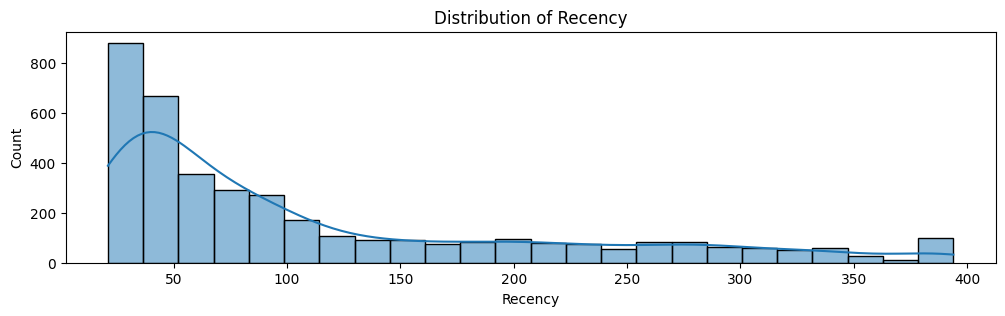

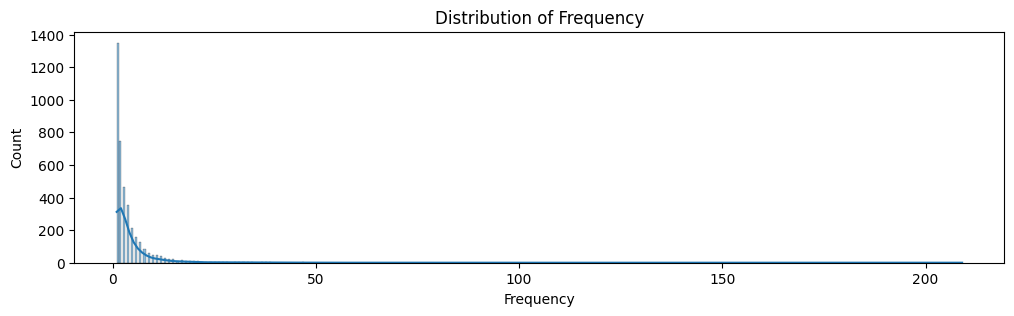

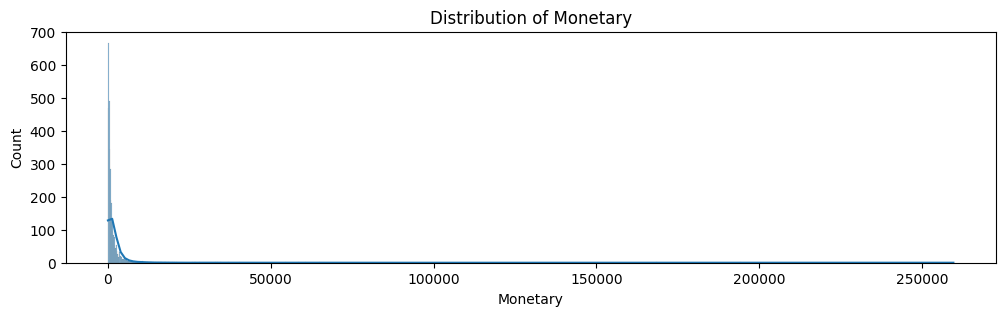

In [ ]:
# show distribution of each variable of the model

colnames = ['Recency', 'Frequency', 'Monetary']

for col in colnames:
    fig, ax = plt.subplots(figsize=(12, 3))
    sns.histplot(data=joined, x=col, kde=True)  # Add a density plot
    ax.set_title(f'Distribution of {col}')
    plt.show()

In [ ]:
grp = joined.groupby('Segment').agg({'CustomerID': 'count',
                                     'Monetary': 'sum',
                                     'Recency': 'mean'}).reset_index()
grp.columns = ['Segment', 'Cust_count', 'Total_monetary', 'Avg_recency']
grp.sort_values(by='Cust_count', ascending=False, inplace=True)
grp

,Segment,Cust_count,Total_monetary,Avg_recency
3,Champions,753,4435061.130,31.613546
4,Hibernating customers,638,248677.792,170.036050
5,Lost customers,437,83387.510,294.116705
6,Loyal,388,866317.590,57.288660
9,Potential Loyalist,378,197487.050,47.296296
1,At Risk,376,640908.901,164.936170
7,Need Attention,268,444834.091,54.171642
0,About To Sleep,252,67081.670,107.023810
8,New Customers,243,50778.860,48.967078
10,Promising,107,77447.730,45.588785


In [ ]:
grp['Count_share'] = grp['Cust_count'] / grp['Cust_count'].sum()
grp['Monetary_share'] = grp['Total_monetary'] / grp['Total_monetary'].sum()
grp

,Segment,Cust_count,Total_monetary,Avg_recency,Count_share,Monetary_share
3,Champions,753,4435061.130,31.613546,0.192092,0.608792
4,Hibernating customers,638,248677.792,170.036050,0.162755,0.034135
5,Lost customers,437,83387.510,294.116705,0.111480,0.011446
6,Loyal,388,866317.590,57.288660,0.098980,0.118918
9,Potential Loyalist,378,197487.050,47.296296,0.096429,0.027109
1,At Risk,376,640908.901,164.936170,0.095918,0.087976
7,Need Attention,268,444834.091,54.171642,0.068367,0.061061
0,About To Sleep,252,67081.670,107.023810,0.064286,0.009208
8,New Customers,243,50778.860,48.967078,0.061990,0.006970
10,Promising,107,77447.730,45.588785,0.027296,0.010631


### Definition and recommended action for each customer

| Segment | Characteristics | Recommendation |
| :-: | :-: | :-: |
| Champions | Bought recently, buy often and spend the most! | Reward them. Can be early adopters for new products. Will promote your brand. |
| Loyal | Spend good money with us often. Responsive to promotions. | Upsell higher value products. Ask for reviews. Engage them. |
| Potential Loyalist | Recent customers, but spent a good amount and bought more than once. | Offer membership / loyalty program, recommend other products. |
| New customers | Bought most recently, but not often. | Provide on-boarding support, give them early success, start building relationship. |
| Promising | Recent shoppers, but haven’t spent much. | Create brand awareness, offer free trials |
| Need attention | Above average recency, frequency and monetary values. May not have bought very recently though. | Make limited time offers, Recommend based on past purchases. Reactivate them. |
| About to sleep | Below average recency, frequency and monetary values. Will lose them if not reactivated. | Share valuable resources, recommend popular products / renewals at discount, reconnect with them. |
| At risk | Spent big money and purchased often. But long time ago. Need to bring them back! | Send personalized emails to reconnect, offer renewals, provide helpful resources. |
| Cannot lose them | Made biggest purchases, and often. But haven’t returned for a long time. | Win them back via renewals or newer products, don’t lose them to competition, talk to them. |
| Hibernating customers | Last purchase was long back, low spenders and low number of orders. | Offer other relevant products and special discounts. Recreate brand value. |
| Lost customers | Lowest recency, frequency and monetary scores. | Revive interest with reach out campaign, ignore otherwise. |

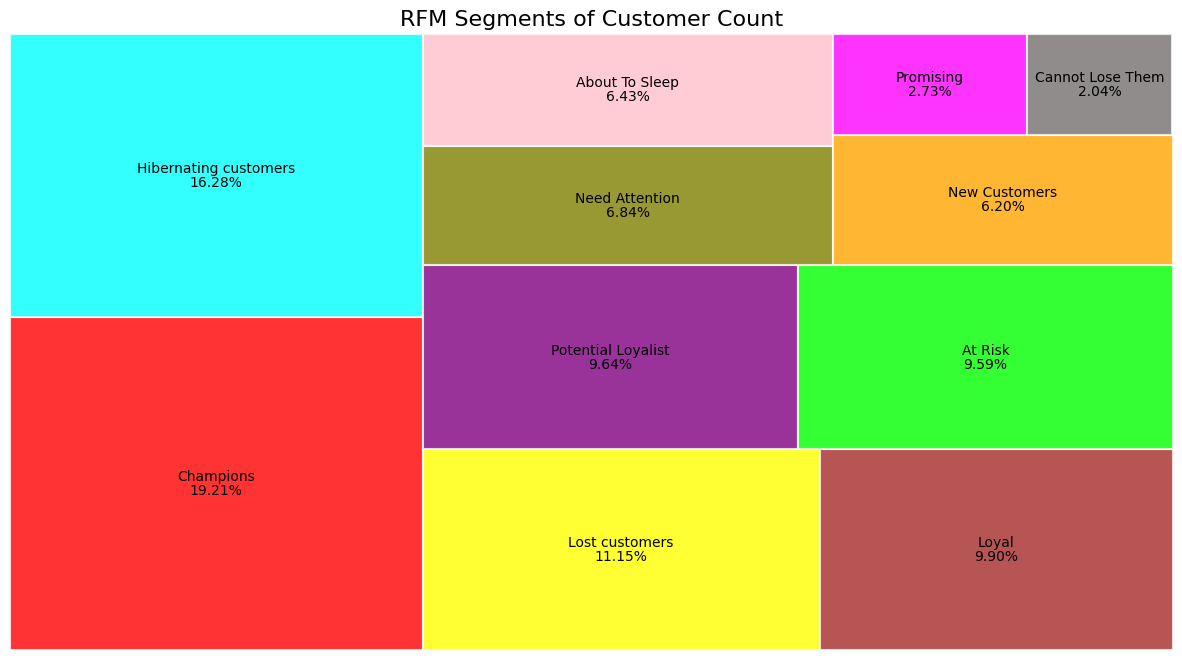

In [ ]:
colors = ['#FF0000','#00FFFF','#FFFF00','#A52A2A','#800080','#00FF00','#808000','#FFC0CB','#FFA500','#FF00FF','#736F6E']

fig, ax = plt.subplots(1, figsize = (15,8))

squarify.plot(sizes=grp['Cust_count'],
              label=grp['Segment'],
              value=[f'{x*100:.2f}%' for x in grp['Count_share']],
              alpha=.8,
              color=colors,
              bar_kwargs=dict(linewidth=1.5, edgecolor="white")
             )
plt.title('RFM Segments of Customer Count', fontsize=16)
plt.axis('off')
plt.show()

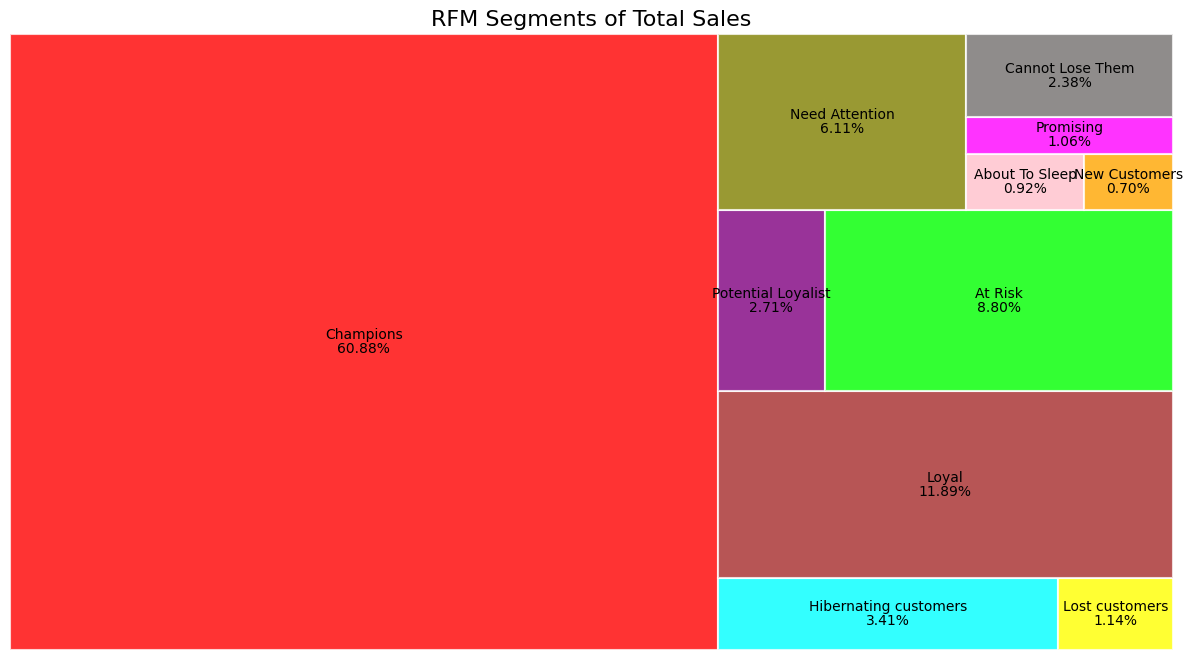

In [ ]:
colors = ['#FF0000','#00FFFF','#FFFF00','#A52A2A','#800080','#00FF00','#808000','#FFC0CB','#FFA500','#FF00FF','#736F6E']

fig, ax = plt.subplots(1, figsize = (15,8))

squarify.plot(sizes=grp['Monetary_share'],
              label=grp['Segment'],
              value=[f'{x*100:.2f}%' for x in grp['Monetary_share']],
              alpha=.8,
              color=colors,
              bar_kwargs=dict(linewidth=1.5, edgecolor="white")
             )
plt.title('RFM Segments of Total Sales', fontsize=16)
plt.axis('off')
plt.show()